In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
data=pd.read_csv('synthetic_asthma_dataset2.csv')
data

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,ASTH100000,52,Female,27.6,Former,1,Moderate,Sedentary,Outdoor,0.38,0,421.0,46.0,0
1,ASTH100001,15,Male,24.6,Former,0,Low,Moderate,Indoor,0.60,2,297.6,22.9,0
2,ASTH100002,72,Female,17.6,Never,0,Moderate,Moderate,Indoor,0.38,0,303.3,15.3,0
3,ASTH100003,61,Male,16.8,Never,0,High,Sedentary,Outdoor,0.60,1,438.0,40.1,1
4,ASTH100004,21,Male,30.2,Never,0,Moderate,Active,Indoor,0.82,3,535.0,27.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,Low,Sedentary,Indoor,0.67,0,580.6,18.7,0
9996,ASTH109996,78,Female,24.8,Never,0,Low,Moderate,Indoor,0.72,1,417.6,40.8,0
9997,ASTH109997,58,Male,30.1,Former,1,Low,Moderate,Indoor,0.28,0,459.1,20.3,1
9998,ASTH109998,88,Female,31.2,Former,0,Moderate,Moderate,Indoor,0.44,0,415.9,25.0,0


# Data Understanding

In [5]:
data.size

140000

In [6]:
data.shape

(10000, 14)

In [7]:
data.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


In [8]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Family_History', 'Air_Pollution_Level', 'Physical_Activity_Level',
       'Occupation_Type', 'Medication_Adherence', 'Number_of_ER_Visits',
       'Peak_Expiratory_Flow', 'FeNO_Level', 'Has_Asthma'],
      dtype='object')

In [9]:
data.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,ASTH100000,52,Female,27.6,Former,1,Moderate,Sedentary,Outdoor,0.38,0,421.0,46.0,0
1,ASTH100001,15,Male,24.6,Former,0,Low,Moderate,Indoor,0.60,2,297.6,22.9,0
2,ASTH100002,72,Female,17.6,Never,0,Moderate,Moderate,Indoor,0.38,0,303.3,15.3,0
3,ASTH100003,61,Male,16.8,Never,0,High,Sedentary,Outdoor,0.60,1,438.0,40.1,1
4,ASTH100004,21,Male,30.2,Never,0,Moderate,Active,Indoor,0.82,3,535.0,27.7,0


In [10]:
data.tail()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
9995,ASTH109995,70,Male,25.0,Never,0,Low,Sedentary,Indoor,0.67,0,580.6,18.7,0
9996,ASTH109996,78,Female,24.8,Never,0,Low,Moderate,Indoor,0.72,1,417.6,40.8,0
9997,ASTH109997,58,Male,30.1,Former,1,Low,Moderate,Indoor,0.28,0,459.1,20.3,1
9998,ASTH109998,88,Female,31.2,Former,0,Moderate,Moderate,Indoor,0.44,0,415.9,25.0,0
9999,ASTH109999,13,Female,16.4,Former,1,High,Moderate,Outdoor,0.23,0,359.4,23.2,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Air_Pollution_Level      10000 non-null  object 
 7   Physical_Activity_Level  10000 non-null  object 
 8   Occupation_Type          10000 non-null  object 
 9   Medication_Adherence     10000 non-null  float64
 10  Number_of_ER_Visits      10000 non-null  int64  
 11  Peak_Expiratory_Flow     10000 non-null  float64
 12  FeNO_Level               10000 non-null  float64
 13  Has_Asthma               10000 non-null  int64  
dtypes: float64(4), int64(4)

In [12]:
data.duplicated().sum()

0

In [13]:
data.size

140000

In [14]:
data.isna().sum()

Patient_ID                 0
Age                        0
Gender                     0
BMI                        0
Smoking_Status             0
Family_History             0
Air_Pollution_Level        0
Physical_Activity_Level    0
Occupation_Type            0
Medication_Adherence       0
Number_of_ER_Visits        0
Peak_Expiratory_Flow       0
FeNO_Level                 0
Has_Asthma                 0
dtype: int64

In [15]:
data=data.drop(columns=[ 'Patient_ID'])

# EDA (Exploratory Data Analysis)

<Axes: >

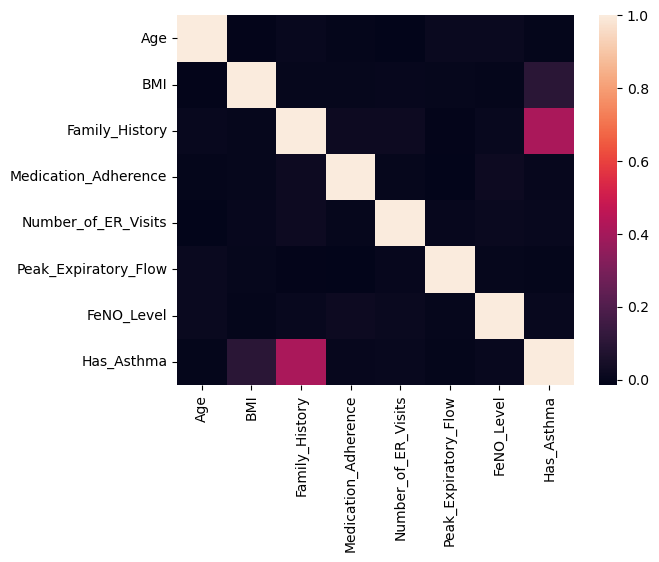

In [17]:
cor=data.select_dtypes(include=["float64","int64"])
sns.heatmap(cor.corr())

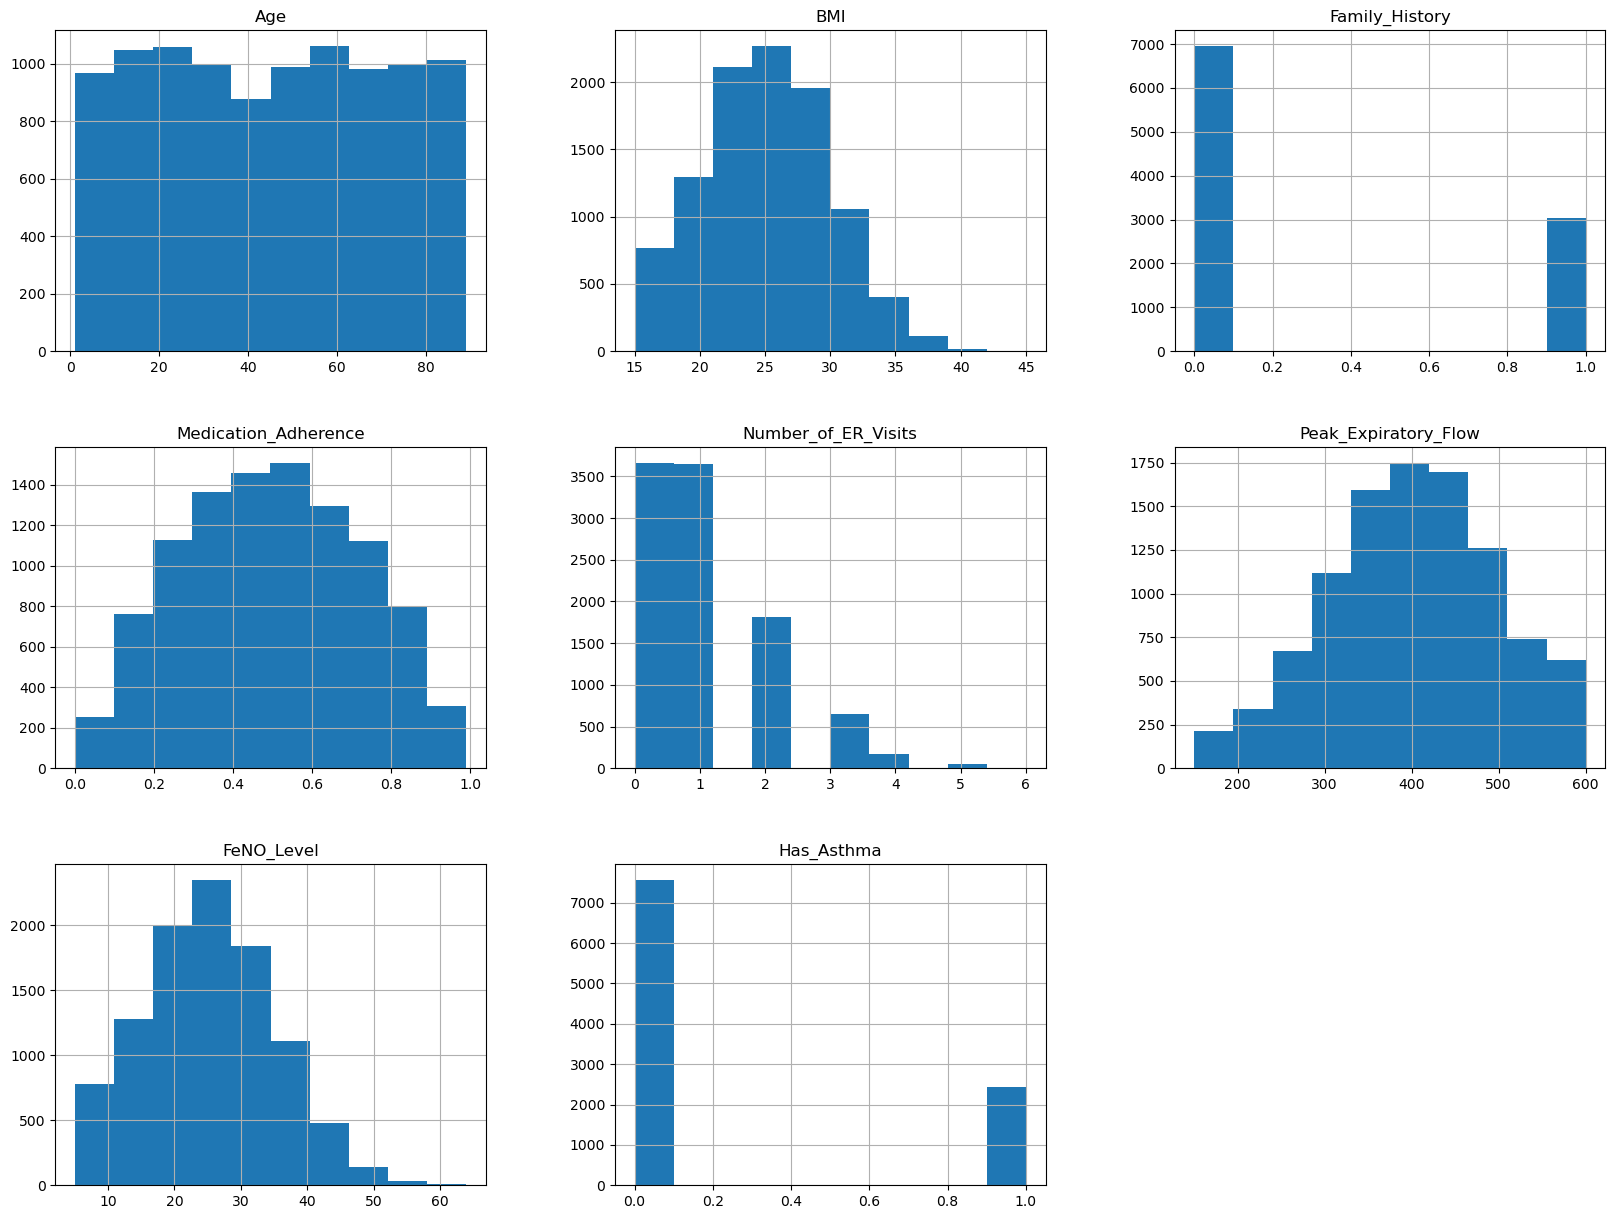

In [18]:
data.hist(figsize=(20,15));
plt.savefig("plt.png")

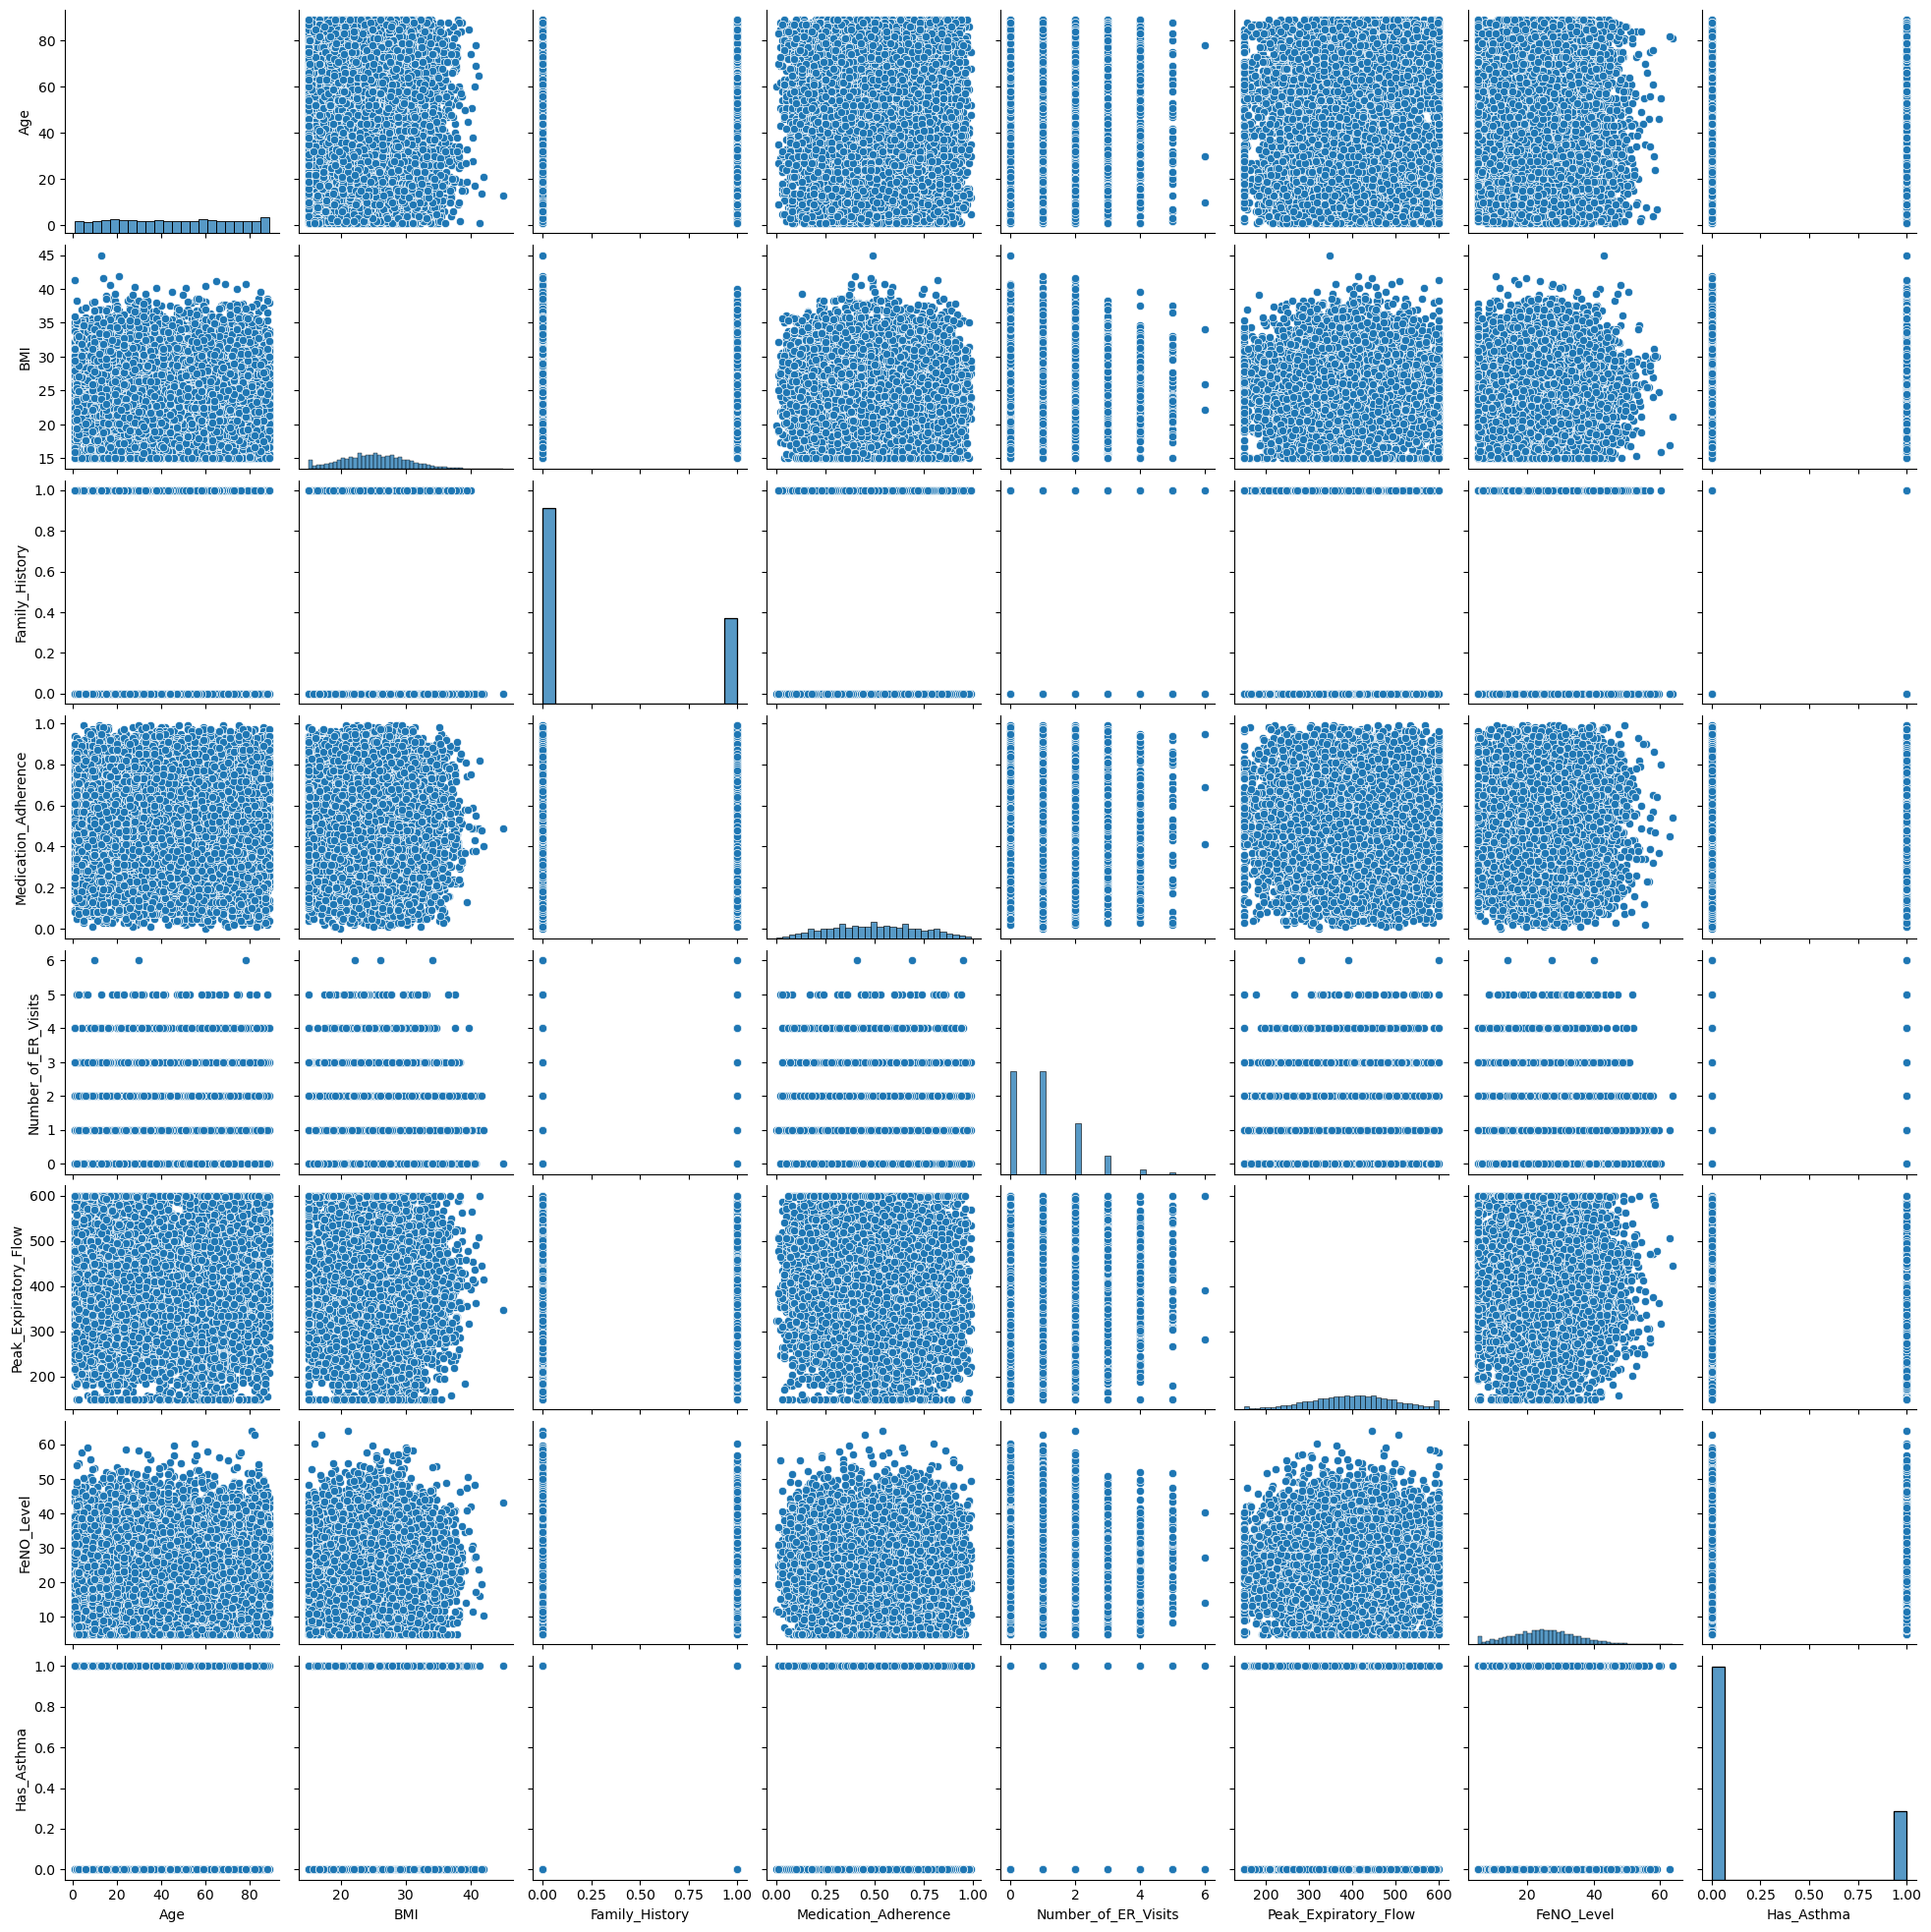

In [19]:
sns.pairplot(data)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'BMI'),
  Text(2, 0, 'Family_History'),
  Text(3, 0, 'Medication_Adherence'),
  Text(4, 0, 'Number_of_ER_Visits'),
  Text(5, 0, 'Peak_Expiratory_Flow'),
  Text(6, 0, 'FeNO_Level'),
  Text(7, 0, 'Has_Asthma')])

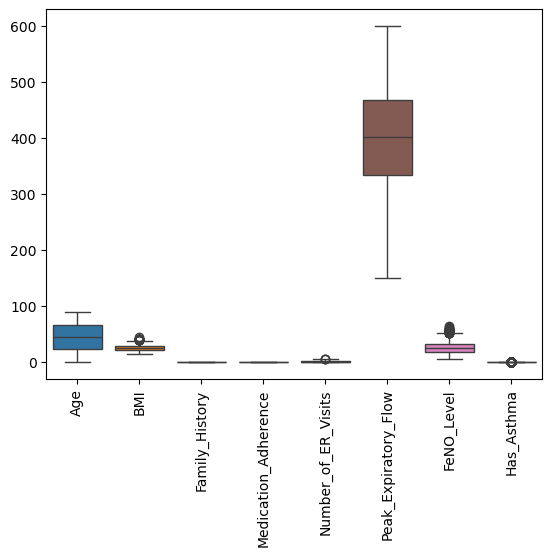

In [20]:
sns.boxplot(data)
plt.xticks(rotation=90)

In [21]:
data=data.drop_duplicates()

In [22]:
data.duplicated().sum()

0

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'BMI'),
  Text(2, 0, 'Family_History'),
  Text(3, 0, 'Medication_Adherence'),
  Text(4, 0, 'Number_of_ER_Visits'),
  Text(5, 0, 'Peak_Expiratory_Flow'),
  Text(6, 0, 'FeNO_Level'),
  Text(7, 0, 'Has_Asthma')])

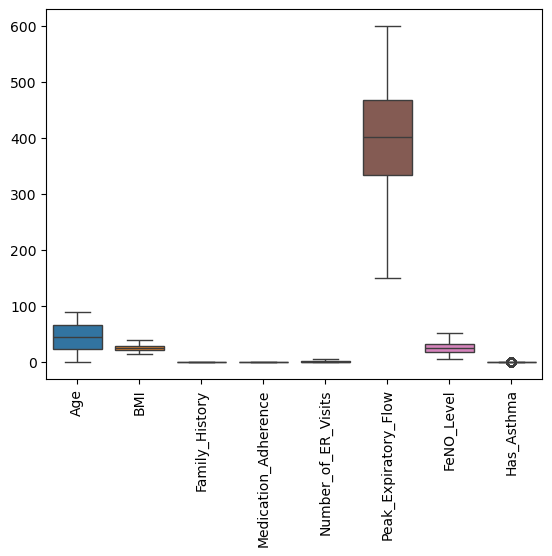

In [151]:
outliers_list=['BMI','Number_of_ER_Visits','FeNO_Level']

for i in outliers_list:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR
    data.loc[(data[i]>=UB),i]=UB
    data.loc[(data[i]<=LB),i]=LB

sns.boxplot(data)
plt.xticks(rotation=90)

# Encoding

In [153]:
encoder1=LabelEncoder()
data["Gender"]=encoder1.fit_transform(data["Gender"])
encoder2=LabelEncoder()
data["Smoking_Status"]=encoder2.fit_transform(data["Smoking_Status"])
encoder3=LabelEncoder()
data["Air_Pollution_Level"]=encoder3.fit_transform(data["Air_Pollution_Level"])
encoder4=LabelEncoder()
data["Physical_Activity_Level"]=encoder4.fit_transform(data["Physical_Activity_Level"])
encoder5=LabelEncoder()
data["Occupation_Type"]=encoder5.fit_transform(data["Occupation_Type"])

data


,Age,Gender,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,0,27.6,1,1,2,2,1,0.38,0,421.0,46.0,0
1,15,1,24.6,1,0,1,1,0,0.60,2,297.6,22.9,0
2,72,0,17.6,2,0,2,1,0,0.38,0,303.3,15.3,0
3,61,1,16.8,2,0,0,2,1,0.60,1,438.0,40.1,1
4,21,1,30.2,2,0,2,0,0,0.82,3,535.0,27.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,1,25.0,2,0,1,2,0,0.67,0,580.6,18.7,0
9996,78,0,24.8,2,0,1,1,0,0.72,1,417.6,40.8,0
9997,58,1,30.1,1,1,1,1,0,0.28,0,459.1,20.3,1
9998,88,0,31.2,1,0,2,1,0,0.44,0,415.9,25.0,0


# X,Y Seperation

In [155]:
#X,Y Seperation
x=data.drop("Has_Asthma", axis=1)
y=data["Has_Asthma"]

In [157]:
x

,Age,Gender,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level
0,52,0,27.6,1,1,2,2,1,0.38,0,421.0,46.0
1,15,1,24.6,1,0,1,1,0,0.60,2,297.6,22.9
2,72,0,17.6,2,0,2,1,0,0.38,0,303.3,15.3
3,61,1,16.8,2,0,0,2,1,0.60,1,438.0,40.1
4,21,1,30.2,2,0,2,0,0,0.82,3,535.0,27.7
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,1,25.0,2,0,1,2,0,0.67,0,580.6,18.7
9996,78,0,24.8,2,0,1,1,0,0.72,1,417.6,40.8
9997,58,1,30.1,1,1,1,1,0,0.28,0,459.1,20.3
9998,88,0,31.2,1,0,2,1,0,0.44,0,415.9,25.0


In [159]:
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Has_Asthma, Length: 10000, dtype: int64

# Scaling

In [162]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new

array([[ 0.27558178, -0.97749697,  0.52446682, ..., -0.99647357,
         0.20626152,  2.13459205],
       [-1.16678533,  0.7724081 , -0.09245862, ...,  0.96586115,
        -1.05903902, -0.22326959],
       [ 1.05523967, -0.97749697, -1.53195131, ..., -0.99647357,
        -1.00059321, -0.99901628],
       ...,
       [ 0.50947915,  0.7724081 ,  1.03857136, ..., -0.99647357,
         0.59692563, -0.48865662],
       [ 1.67896599, -0.97749697,  1.26477735, ..., -0.99647357,
         0.1539679 , -0.00891854],
       [-1.24475112, -0.97749697, -1.77872148, ..., -0.99647357,
        -0.42536338, -0.19264801]])

# Train-test-split

In [165]:
x_new_train,x_new_test,y_train,y_test=train_test_split(x_new,y,test_size=.3,random_state=42)

# LogisticRegression

In [168]:
model=LogisticRegression()
model.fit(x_new_train,y_train)

LogisticRegression()

In [170]:
train_pred=model.predict(x_new_train)
train_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [172]:
test_pred=model.predict(x_new_test)
test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [174]:
score=accuracy_score(train_pred,y_train)
score

0.8551428571428571

In [176]:
score1=accuracy_score(test_pred,y_test)
score1

0.862

In [178]:
cm=confusion_matrix(train_pred,y_train)
cm

array([[4965,  674],
       [ 340, 1021]], dtype=int64)

In [180]:
cr=classification_report(train_pred,y_train)

# DecisionTreeClassifier

In [183]:
model1=DecisionTreeClassifier()
model1.fit(x_new_train,y_train)

DecisionTreeClassifier()

In [185]:
train_pred1=model1.predict(x_new_train)
train_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [187]:
test_pred1=model1.predict(x_new_test)
test_pred1

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [189]:
score2=accuracy_score(train_pred1,y_train)
score2

1.0

In [191]:
score3=accuracy_score(test_pred1,y_test)
score3

0.894

In [193]:
cm2=confusion_matrix(train_pred1,y_train)
cm

array([[4965,  674],
       [ 340, 1021]], dtype=int64)

In [195]:
cr2=classification_report(train_pred1,y_train)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5639
           1       0.60      0.75      0.67      1361

    accuracy                           0.86      7000
   macro avg       0.77      0.82      0.79      7000
weighted avg       0.87      0.86      0.86      7000



In [197]:
# RandomForestClassifier

In [199]:
model2=RandomForestClassifier()
model2.fit(x_new_train,y_train)

RandomForestClassifier()

In [200]:
train_pred2=model2.predict(x_new_train)
train_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [201]:
test_pred2=model2.predict(x_new_test)
test_pred2

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [202]:
score4=accuracy_score(train_pred2,y_train)
score4

1.0

In [207]:
score5=accuracy_score(test_pred2,y_test)
score5

0.913

In [209]:
cm3=confusion_matrix(train_pred2,y_train)
cm

array([[4965,  674],
       [ 340, 1021]], dtype=int64)

In [211]:
cr3=classification_report(train_pred2,y_train)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5639
           1       0.60      0.75      0.67      1361

    accuracy                           0.86      7000
   macro avg       0.77      0.82      0.79      7000
weighted avg       0.87      0.86      0.86      7000



# AdaBoostClassifier

In [214]:
model3=AdaBoostClassifier()
model3.fit(x_new_train,y_train)

AdaBoostClassifier()

In [215]:
train_pred3=model3.predict(x_new_train)
train_pred3

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [218]:
test_pred3=model3.predict(x_new_test)
test_pred3

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [220]:
score6=accuracy_score(train_pred3,y_train)
score6

0.895

In [222]:
score7=accuracy_score(test_pred3,y_test)
score7

0.9043333333333333

In [224]:
cm4=confusion_matrix(train_pred3,y_train)
cm4

array([[4927,  357],
       [ 378, 1338]], dtype=int64)

In [226]:
cr4=classification_report(train_pred3,y_train)
print(cr4)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5284
           1       0.79      0.78      0.78      1716

    accuracy                           0.90      7000
   macro avg       0.86      0.86      0.86      7000
weighted avg       0.89      0.90      0.89      7000



# GradientBoostingClassifier

In [229]:
model4=GradientBoostingClassifier()
model4.fit(x_new_train,y_train)

GradientBoostingClassifier()

In [230]:
train_pred4=model4.predict(x_new_train)
train_pred4

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [231]:
test_pred4=model4.predict(x_new_test)
test_pred4

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [232]:
score8=accuracy_score(train_pred4,y_train)
score8

0.9274285714285714

In [233]:
score9=accuracy_score(test_pred4,y_test)
score9

0.9233333333333333

In [234]:
cm5=confusion_matrix(train_pred4,y_train)
cm5

array([[4815,   18],
       [ 490, 1677]], dtype=int64)

In [241]:
cr5=classification_report(train_pred4,y_train)
print(cr5)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4833
           1       0.99      0.77      0.87      2167

    accuracy                           0.93      7000
   macro avg       0.95      0.89      0.91      7000
weighted avg       0.93      0.93      0.92      7000



# XGBClassifier

In [244]:
model5=XGBClassifier()
model5.fit(x_new_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [246]:
train_pred5=model5.predict(x_new_train)
train_pred5

array([0, 0, 0, ..., 1, 0, 0])

In [248]:
test_pred5=model5.predict(x_new_test)
test_pred5

array([0, 1, 0, ..., 0, 1, 0])

In [250]:
score10=accuracy_score(train_pred5,y_train)
score10

0.9998571428571429

In [252]:
score11=accuracy_score(test_pred5,y_test)
score11

0.9123333333333333

In [254]:
cm6=confusion_matrix(train_pred5,y_train)
cm6

array([[5304,    0],
       [   1, 1695]], dtype=int64)

In [256]:
cr6=classification_report(train_pred5,y_train)
print(cr6)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5304
           1       1.00      1.00      1.00      1696

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



# KNN

In [259]:
model6=KNeighborsClassifier(n_neighbors=10)
model6.fit(x_new_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [261]:
train_pred6=model6.predict(x_new_train)
train_pred6

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [262]:
test_pred6=model6.predict(x_new_test)
test_pred6

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [263]:
score12=accuracy_score(train_pred6,y_train)
score12

0.8757142857142857

In [264]:
score13=accuracy_score(test_pred6,y_test)
score13

0.851

In [265]:
cm7=confusion_matrix(train_pred6,y_train)
cm7

array([[5152,  717],
       [ 153,  978]], dtype=int64)

In [266]:
cr7=classification_report(train_pred,y_train)
print(cr7)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5639
           1       0.60      0.75      0.67      1361

    accuracy                           0.86      7000
   macro avg       0.77      0.82      0.79      7000
weighted avg       0.87      0.86      0.86      7000



In [268]:
# rbf=SVC()
# rbf.fit(x_new_train,y_train)
# rbf.score(x_new_test,y_test)

In [269]:
# linear=SVC(kernel="linear")
# linear.fit(x_new_train,y_train)
# linear.score(x_new_test,y_test)

In [270]:
# poly=SVC(kernel="poly",degree=3,gamma=15,C=200)
# poly.fit(x_new_train,y_train)
# poly.score(x_new_test,y_test)

In [271]:
# sigmoid=SVC(kernel="sigmoid",gamma=1,C=5)
# sigmoid.fit(x_new_train,y_train)
# sigmoid.score(x_new_test,y_test)

# GaussianNB

In [282]:
model7=GaussianNB()
model7.fit(x_new_train,y_train)

GaussianNB()

In [284]:
train_pred7=model7.predict(x_new_train)
train_pred7

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [286]:
test_pred7=model7.predict(x_new_test)
test_pred7

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [288]:
score14=accuracy_score(train_pred7,y_train)
score14

0.8565714285714285

In [290]:
score15=accuracy_score(test_pred7,y_test)
score15

0.864

In [292]:
cm8=confusion_matrix(train_pred7,y_train)
cm8

array([[5032,  731],
       [ 273,  964]], dtype=int64)

In [294]:
cr8=classification_report(train_pred7,y_train)
print(cr8)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      5763
           1       0.57      0.78      0.66      1237

    accuracy                           0.86      7000
   macro avg       0.76      0.83      0.78      7000
weighted avg       0.88      0.86      0.86      7000



In [296]:
model_names=["Logistic Regession","Decision tree","Random forest","adaboost","Gradient boosting","XGB","knn","GaussianNB"]
train_scores=[score,score2,score4,score6,score8,score10,score12,score14]
test_scores=[score1,score3,score5,score7,score9,score11,score13,score15]

In [298]:
pd.DataFrame({"model":model_names,"test_accuracy":train_scores,"train_accuracy":test_scores})

,model,test_accuracy,train_accuracy
0,Logistic Regession,0.855143,0.862000
1,Decision tree,1.000000,0.894000
2,Random forest,1.000000,0.913000
3,adaboost,0.895000,0.904333
4,Gradient boosting,0.927429,0.923333
5,XGB,0.999857,0.912333
6,knn,0.875714,0.851000
7,GaussianNB,0.856571,0.864000


# After balancing data

In [301]:
over=SMOTE(random_state=2)
x_os,y_os=over.fit_resample(x_new,y)

In [303]:
y_os.value_counts()

Has_Asthma
0    7567
1    7567
Name: count, dtype: int64

In [305]:
x_os_train,x_os_test,y_os_train,y_os_test=train_test_split(x_os,y_os,test_size=.3,random_state=42)

In [307]:
mdl1=LogisticRegression()
mdl1.fit(x_os_train,y_os_train)

LogisticRegression()

In [309]:
tr_pred1=mdl1.predict(x_os_train)
tr_pred1

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [311]:
ts_pred1=mdl1.predict(x_os_test)
ts_pred1

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [313]:
sc1=accuracy_score(tr_pred1,y_os_train)
sc1

0.8549985839705466

In [315]:
sc2=accuracy_score(ts_pred1,y_os_test)
sc2

0.856419290905087

In [317]:
c_matrix=confusion_matrix(tr_pred1,y_os_train)
c_matrix

array([[4410,  628],
       [ 908, 4647]], dtype=int64)

In [319]:
c_report=classification_report(tr_pred1,y_os_train)
print(c_report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      5038
           1       0.88      0.84      0.86      5555

    accuracy                           0.85     10593
   macro avg       0.86      0.86      0.85     10593
weighted avg       0.86      0.85      0.86     10593



In [321]:
mdl2=DecisionTreeClassifier()
mdl2.fit(x_os_train,y_os_train)

DecisionTreeClassifier()

In [323]:
tr_pred2=mdl2.predict(x_os_train)
tr_pred2

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [325]:
ts_pred2=mdl2.predict(x_os_test)
ts_pred2

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [327]:
sc3=accuracy_score(tr_pred2,y_os_train)
sc3

1.0

In [329]:
sc4=accuracy_score(ts_pred2,y_os_test)
sc4

0.9207223078617045

In [331]:
c_matrix1=confusion_matrix(tr_pred2,y_os_train)
c_matrix1

array([[5318,    0],
       [   0, 5275]], dtype=int64)

In [333]:
c_report1=classification_report(tr_pred2,y_os_train)
print(c_report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5318
           1       1.00      1.00      1.00      5275

    accuracy                           1.00     10593
   macro avg       1.00      1.00      1.00     10593
weighted avg       1.00      1.00      1.00     10593



In [335]:
mdl3=RandomForestClassifier()
mdl3.fit(x_os_train,y_os_train)

RandomForestClassifier()

In [336]:
tr_pred3=mdl3.predict(x_os_train)
tr_pred3

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [337]:
ts_pred3=mdl3.predict(x_os_test)
ts_pred3

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [338]:
sc5=accuracy_score(tr_pred3,y_os_train)
sc5

0.9999055980364392

In [339]:
sc6=accuracy_score(ts_pred3,y_os_test)
sc6

0.953534463774499

In [340]:
c_matrix2=confusion_matrix(tr_pred3,y_os_train)
c_matrix2

array([[5317,    0],
       [   1, 5275]], dtype=int64)

In [341]:
c_report2=classification_report(tr_pred3,y_os_train)
print(c_report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5317
           1       1.00      1.00      1.00      5276

    accuracy                           1.00     10593
   macro avg       1.00      1.00      1.00     10593
weighted avg       1.00      1.00      1.00     10593



In [343]:
mdl4=AdaBoostClassifier()
mdl4.fit(x_os_train,y_os_train)

AdaBoostClassifier()

In [349]:
tr_pred4=mdl4.predict(x_os_train)
tr_pred4

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [351]:
ts_pred4=mdl4.predict(x_os_test)
ts_pred4

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [352]:
sc7=accuracy_score(tr_pred4,y_os_train)
sc7

0.9252336448598131

In [354]:
sc8=accuracy_score(ts_pred4,y_os_test)
sc8

0.9315128826249724

In [356]:
c_matrix3=confusion_matrix(tr_pred4,y_os_train)
c_matrix3

array([[4838,  312],
       [ 480, 4963]], dtype=int64)

In [361]:
c_report3=classification_report(tr_pred4,y_os_train)
print(c_report3)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      5150
           1       0.94      0.91      0.93      5443

    accuracy                           0.93     10593
   macro avg       0.93      0.93      0.93     10593
weighted avg       0.93      0.93      0.93     10593



In [363]:
mld5=GradientBoostingClassifier()
mld5.fit(x_os_train,y_os_train)

GradientBoostingClassifier()

In [364]:
tr_pred5=mld5.predict(x_os_train)
tr_pred5

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [365]:
ts_pred5=mld5.predict(x_os_test)
ts_pred5

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [366]:
sc9=accuracy_score(tr_pred5,y_os_train)
sc9

0.9477013121872935

In [367]:
sc10=accuracy_score(ts_pred5,y_os_test)
sc10

0.9537546795859942

In [368]:
c_matrix4=confusion_matrix(tr_pred5,y_os_train)
c_matrix4

array([[4767,    3],
       [ 551, 5272]], dtype=int64)

In [369]:
c_report4=classification_report(tr_pred5,y_os_train)
print(c_report4)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4770
           1       1.00      0.91      0.95      5823

    accuracy                           0.95     10593
   macro avg       0.95      0.95      0.95     10593
weighted avg       0.95      0.95      0.95     10593



In [370]:
mdl6=XGBClassifier()
mdl6.fit(x_os_train,y_os_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [371]:
tr_pred6=mdl6.predict(x_os_train)
tr_pred6

array([1, 1, 0, ..., 1, 0, 0])

In [372]:
ts_pred6=mdl6.predict(x_os_test)
ts_pred6

array([0, 1, 0, ..., 1, 1, 0])

In [373]:
sc11=accuracy_score(tr_pred6,y_os_train)
sc11

0.9990559803643916

In [380]:
sc12=accuracy_score(ts_pred6,y_os_test)
sc12

0.9522131689055274

In [382]:
c_matrix5=confusion_matrix(tr_pred6,y_os_train)
c_matrix5

array([[5308,    0],
       [  10, 5275]], dtype=int64)

In [387]:
c_report5=classification_report(tr_pred6,y_os_train)
print(c_report5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5308
           1       1.00      1.00      1.00      5285

    accuracy                           1.00     10593
   macro avg       1.00      1.00      1.00     10593
weighted avg       1.00      1.00      1.00     10593



In [390]:
mdl7=KNeighborsClassifier(n_neighbors=10)
mdl7.fit(x_os_train,y_os_train)

KNeighborsClassifier(n_neighbors=10)

In [392]:
tr_pred7=mdl7.predict(x_os_train)
tr_pred7

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [394]:
ts_pred7=mdl7.predict(x_os_test)
ts_pred7

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [395]:
sc13=accuracy_score(tr_pred7,y_os_train)
sc13

0.9260832625318607

In [396]:
sc14=accuracy_score(ts_pred7,y_os_test)
sc14

0.9200616604272187

In [397]:
c_matrix6=confusion_matrix(tr_pred7,y_os_train)
c_matrix6

array([[4663,  128],
       [ 655, 5147]], dtype=int64)

In [398]:
c_report6=classification_report(tr_pred7,y_os_train)
print(c_report6)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4791
           1       0.98      0.89      0.93      5802

    accuracy                           0.93     10593
   macro avg       0.93      0.93      0.93     10593
weighted avg       0.93      0.93      0.93     10593



In [399]:
mdl8=GaussianNB()
mdl8.fit(x_os_train,y_os_train)

GaussianNB()

In [400]:
tr_pred8=mdl8.predict(x_os_train)
tr_pred8

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [401]:
ts_pred8=mdl8.predict(x_os_test)
ts_pred8

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [402]:
sc15=accuracy_score(tr_pred8,y_os_train)
sc15

0.8838855848201642

In [403]:
sc16=accuracy_score(ts_pred8,y_os_test)
sc16

0.8883505835719004

In [404]:
c_matrix7=confusion_matrix(tr_pred8,y_os_train)
c_matrix7

array([[4281,  193],
       [1037, 5082]], dtype=int64)

In [405]:
c_report7=classification_report(tr_pred8,y_os_train)
print(c_report7)

              precision    recall  f1-score   support

           0       0.81      0.96      0.87      4474
           1       0.96      0.83      0.89      6119

    accuracy                           0.88     10593
   macro avg       0.88      0.89      0.88     10593
weighted avg       0.90      0.88      0.88     10593



In [407]:
train_scores_balance=[sc1,sc3,sc5,sc7,sc9,sc11,sc13,sc15]
test_scores_balance=[sc2,sc4,sc6,sc8,sc10,sc12,sc14,sc16]

In [408]:
pd.DataFrame({"model":model_names,"accuracy_before_balancing":test_scores,"accuracy_after_balancing":test_scores_balance})

,model,accuracy_before_balancing,accuracy_after_balancing
0,Logistic Regession,0.862000,0.856419
1,Decision tree,0.894000,0.920722
2,Random forest,0.913000,0.953534
3,adaboost,0.904333,0.931513
4,Gradient boosting,0.923333,0.953755
5,XGB,0.912333,0.952213
6,knn,0.851000,0.920062
7,GaussianNB,0.864000,0.888351


# Hyper parameter tuning

In [410]:
# model_params={"LogisticRgression":{"model":LogisticRegression(),"params":{"C":[1,5,10]}},
#              "DecisionTreeClassifier":{"model":DecisionTreeClassifier(),"params":{"criterion":["gini","entropy"],"splitter":["best","random"]}},
#              "RandomForestClassifier":{"model":RandomForestClassifier(),"params":{"n_estimators":[10,50,100],"criterion":["gini","entropy"]}},
#              "AdaBoostClassifier":{"model":AdaBoostClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1]}},
#              "GradientBoostingClassifier":{"model":GradientBoostingClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]}},
#              "XGBClassifier":{"model":XGBClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]}},
#              "knn":{"model":KNeighborsClassifier(),"params":{"n_neighbors":[3,5,7],"weights":["uniform","distance"]}},
#              "GaussianNB":{"model":GaussianNB(),"params":{"priors":[None,[0.5,0.5],[0.7,0.3]]}}}

In [411]:
# scores=[]
# models=["LogisticRgression","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","GradientBoostingClassifier","XGBClassifier","knn","GaussianNB"]
# for model_name in models:
#     mp=model_params[model_name]
#     gds=GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
#     gds.fit(x_os,y_os)
#     scores.append({"model":model_name,"best_score":gds.best_score_,"best_params":gds.best_params_})

In [412]:
#scores

In [427]:
#pd.DataFrame(scores)

In [431]:
lr=GridSearchCV(mdl1,{"C":[1,5,10],"penalty":["l1","l2"],"solver":["liblinear","saga"]},cv=5,return_train_score=True)
lr.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True)

In [433]:
lr_data1=lr.cv_results_

In [434]:
lr.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}

In [435]:
s1=lr.best_score_
s1

0.8545282775874201

In [436]:
lr_model=LogisticRegression(C=5,penalty="l1",solver="liblinear")
lr_model.fit(x_os_train,y_os_train)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [437]:
trpred1=lr_model.predict(x_os_train)
trpred1

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [438]:
tspred1=lr_model.predict(x_os_test)
tspred1

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [439]:
p_sc1=accuracy_score(trpred1,y_os_train)
p_sc1

0.8549041820069857

In [440]:
p_sc2=accuracy_score(tspred1,y_os_test)
p_sc2

0.856419290905087

In [441]:
ds=GridSearchCV(mdl2,{"criterion":["gini","entropy"],"splitter":["best","random"]},cv=5,return_train_score=True)
ds.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [442]:
ds_data2=ds.cv_results_

In [444]:
ds.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [453]:
s2=ds.best_score_
s2

0.9240066380840464

In [454]:
ds_model=DecisionTreeClassifier(criterion="entropy",splitter="best")
ds_model.fit(x_os_train,y_os_train)

DecisionTreeClassifier(criterion='entropy')

In [455]:
trpred2=ds_model.predict(x_os_train)
trpred2

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [456]:
tspred2=ds_model.predict(x_os_test)
tspred2

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [460]:
p_sc3=accuracy_score(trpred2,y_os_train)
p_sc3

1.0

In [465]:
p_sc4=accuracy_score(tspred2,y_os_test)
p_sc4

0.9312926668134772

In [468]:
rf=GridSearchCV(mdl3,{"n_estimators":[10,50,100],"criterion":["gini","entropy"]},cv=5,return_train_score=True)
rf.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [469]:
rf_data3=rf.cv_results_

In [470]:
rf.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [471]:
s3=rf.best_score_
s3

0.9464748324547765

In [472]:
rf_model=RandomForestClassifier(criterion="entropy",n_estimators=100)
rf_model.fit(x_os_train,y_os_train)

RandomForestClassifier(criterion='entropy')

In [473]:
trpred3=rf_model.predict(x_os_train)
trpred3

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [474]:
tspred3=rf_model.predict(x_os_test)
tspred3

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [475]:
p_sc5=accuracy_score(trpred3,y_os_train)
p_sc5

1.0

In [476]:
p_sc6=accuracy_score(tspred3,y_os_test)
p_sc6

0.9539748953974896

In [477]:
ada=GridSearchCV(mdl4,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1]},cv=5,return_train_score=True)
ada.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [478]:
ada_data4=ada.cv_results_

In [479]:
ada.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [480]:
s4=ada.best_score_
s4

0.9296703996976854

In [481]:
ada_model=AdaBoostClassifier(learning_rate=1,n_estimators=100)
ada_model.fit(x_os_train,y_os_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [482]:
trpred4=ada_model.predict(x_os_train)
trpred4

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [483]:
tspred4=ada_model.predict(x_os_test)
tspred4

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [484]:
p_sc7=accuracy_score(trpred4,y_os_train)
p_sc7

0.9304257528556594

In [485]:
p_sc8=accuracy_score(tspred4,y_os_test)
p_sc8

0.9348161197974014

In [486]:
gb=GridSearchCV(mld5,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]},cv=5,return_train_score=True)
gb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [487]:
gb_data5=gb.cv_results_

In [488]:
gb.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [489]:
s5=gb.best_score_
s5

0.9456255088521898

In [490]:
gb_model=GradientBoostingClassifier(learning_rate=0.2,n_estimators=100)
gb_model.fit(x_os_train,y_os_train)

GradientBoostingClassifier(learning_rate=0.2)

In [491]:
trpred5=gb_model.predict(x_os_train)
trpred5

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [492]:
tspred5=gb_model.predict(x_os_test)
tspred5

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [493]:
p_sc9=accuracy_score(trpred5,y_os_train)
p_sc9

0.952138204474653

In [494]:
p_sc10=accuracy_score(tspred5,y_os_test)
p_sc10

0.9541951112089848

In [495]:
xgb=GridSearchCV(mdl6,{"n_estimators":[50,100],"gamma":[0,1,5],"booster":["gbtree","gblinear","dart"]},cv=5,return_train_score=True)
xgb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 1, 5], 'n_estimators': [50, 100]},
             return_train_score=True)

In [496]:
xgb_data6=xgb.cv_results_

In [497]:
xgb.best_params_

{'booster': 'gbtree', 'gamma': 5, 'n_estimators': 50}

In [498]:
s6=xgb.best_score_
s6

0.9458142771391177

In [499]:
xgb_model=XGBClassifier(booster="gbtree",gamma=0,n_estimators=100)
xgb_model.fit(x_os_train,y_os_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [500]:
trpred6=xgb_model.predict(x_os_train)
trpred6

array([1, 1, 0, ..., 1, 0, 0])

In [501]:
tspred6=xgb_model.predict(x_os_test)
tspred6

array([0, 1, 0, ..., 1, 1, 0])

In [502]:
p_sc11=accuracy_score(trpred6,y_os_train)
p_sc11

0.9990559803643916

In [503]:
p_sc12=accuracy_score(tspred6,y_os_test)
p_sc12

0.9522131689055274

In [504]:
knn=GridSearchCV(mdl7,{"n_neighbors":[3,5,7],"weights":["uniform","distance"]},cv=5,return_train_score=True)
knn.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [505]:
knn_data7=knn.cv_results_

In [506]:
knn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [507]:
s7=knn.best_score_
s7

0.913529196028023

In [508]:
knn_model=KNeighborsClassifier(n_neighbors=3,weights="distance")
knn_model.fit(x_os_train,y_os_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [509]:
trpred7=knn_model.predict(x_os_train)
trpred7

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [510]:
tspred7=knn_model.predict(x_os_test)
tspred7

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [511]:
p_sc13=accuracy_score(trpred7,y_os_train)
p_sc13

1.0

In [512]:
p_sc14=accuracy_score(tspred7,y_os_test)
p_sc14

0.9290905086985246

In [513]:
gnb=GridSearchCV(mdl8,{"priors":[None,[0.5,0.5],[0.7,0.3]]},cv=5,return_train_score=True)
gnb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.5, 0.5], [0.7, 0.3]]},
             return_train_score=True)

In [514]:
gnb_data8=gnb.cv_results_

In [515]:
gnb.best_params_

{'priors': None}

In [516]:
s8=gnb.best_score_
s8

0.8828488236072657

In [517]:
gnb_model=GaussianNB(priors=[0.5,0.5])
gnb_model.fit(x_os_train,y_os_train)

GaussianNB(priors=[0.5, 0.5])

In [518]:
trpred8=gnb_model.predict(x_os_train)
trpred8

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [519]:
tspred8=gnb_model.predict(x_os_test)
tspred8

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [520]:
p_sc15=accuracy_score(trpred8,y_os_train)
p_sc15

0.8833191730387993

In [521]:
p_sc16=accuracy_score(tspred8,y_os_test)
p_sc16

0.8876899361374146

In [522]:
tuning_scores=[s1,s2,s3,s4,s5,s6,s7,s8]
train_tuning_scores=[p_sc1,p_sc3,p_sc5,p_sc7,p_sc9,p_sc11,p_sc13,p_sc15]
test_tuning_scores=[p_sc2,p_sc4,p_sc6,p_sc8,p_sc10,p_sc12,p_sc14,p_sc16]

In [523]:
pd.DataFrame({"model":model_names,"accuracy":test_scores_balance,"accuracy_after_hyperparametertuning":test_tuning_scores})

,model,accuracy,accuracy_after_hyperparametertuning
0,Logistic Regession,0.856419,0.856419
1,Decision tree,0.920722,0.931293
2,Random forest,0.953534,0.953975
3,adaboost,0.931513,0.934816
4,Gradient boosting,0.953755,0.954195
5,XGB,0.952213,0.952213
6,knn,0.920062,0.929091
7,GaussianNB,0.888351,0.887690


In [524]:
pd.DataFrame({"model":model_names,"train_accuracy":train_tuning_scores,"test_accuracy":test_tuning_scores})

,model,train_accuracy,test_accuracy
0,Logistic Regession,0.854904,0.856419
1,Decision tree,1.000000,0.931293
2,Random forest,1.000000,0.953975
3,adaboost,0.930426,0.934816
4,Gradient boosting,0.952138,0.954195
5,XGB,0.999056,0.952213
6,knn,1.000000,0.929091
7,GaussianNB,0.883319,0.887690


***Deployment***

In [526]:
import joblib

In [608]:
joblib.dump(gb_model,'C:/Users/rafab/model.pkl')

['C:/Users/rafab/model.pkl']

In [610]:
joblib.dump(encoder1,'C:/Users/rafab/encoder1.pkl')
joblib.dump(encoder2,'C:/Users/rafab/encoder2.pkl')
joblib.dump(encoder3,'C:/Users/rafab/encoder3.pkl')
joblib.dump(encoder4,'C:/Users/rafab/encoder4.pkl')
joblib.dump(encoder5,'C:/Users/rafab/encoder5.pkl')
joblib.dump(scaler,'C:/Users/rafab/scaler.pkl')

['C:/Users/rafab/scaler.pkl']